In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.model_selection import train_test_split

In [90]:
np.random.seed(10)
X=np.linspace(-5,5,150)
y=1/5*X**3+np.sin(X)-2*X**2-5*X+ np.random.rand(len(X))*20

X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train=X_train.reshape((X_train.shape[0],1))
y_train=y_train.reshape((y_train.shape[0],1))
y_train.shape

(112, 1)

In [91]:
RR=Ridge()
RR.fit(X_train,y_train)
pred_rr=RR.predict(X_train)

In [95]:
kRR=KernelRidge(kernel='rbf')
kRR.fit(X_train,y_train)
pred_krr=kRR.predict(X_train)


In [96]:
import pandas as pd
d = {'X': X_train[:,0], 'y': y_train[:,0],'pred_rr':pred_rr[:,0],'pred_krr':pred_krr[:,0] }
df=pd.DataFrame(data=d)
df=df.sort_values(by='X')
df

,X,y,pred_rr,pred_krr
111,-5.000000,-33.614663,3.035411,-25.677670
33,-4.865772,-32.401532,2.772386,-26.119855
86,-4.798658,-28.188434,2.640874,-26.003604
69,-4.731544,-31.332827,2.509361,-25.667469
76,-4.664430,-34.993583,2.377849,-25.122628
...,...,...,...,...
10,4.664430,-35.854179,-15.902370,-33.164148
9,4.731544,-34.070057,-16.033883,-33.396402
24,4.865772,-41.059430,-16.296907,-33.317454
103,4.932886,-36.422403,-16.428420,-32.976836


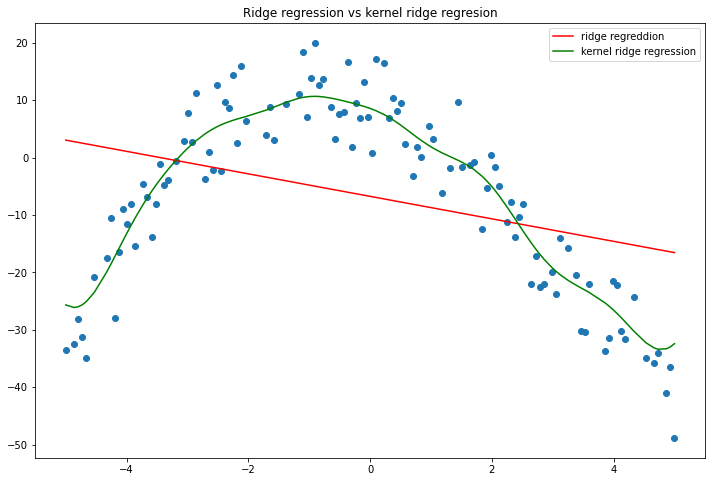

In [97]:
plt.figure(figsize=(12,8))
plt.scatter(X_train,y_train)
plt.plot(df['X'],df['pred_rr'],c='r',label="ridge regreddion")
plt.plot(df['X'],df['pred_krr'],c='g',label="kernel ridge regression")
plt.title("Ridge regression vs kernel ridge regresion")
plt.legend()

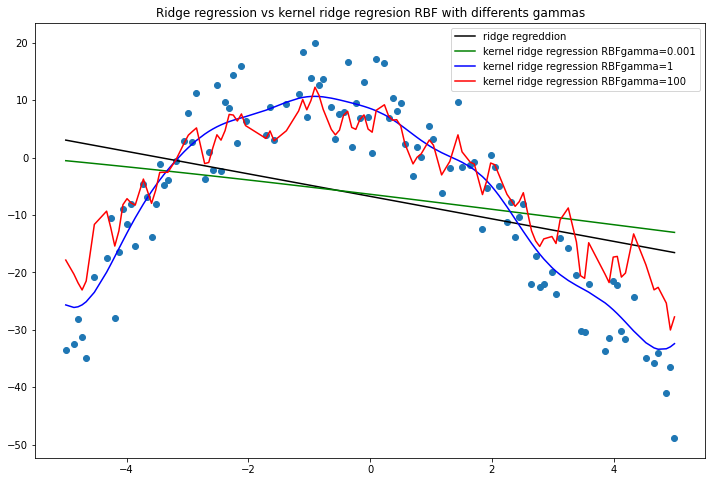

In [98]:
#Comparent plusieur modéle rbf,polynomial:


RR_1=KernelRidge(kernel='rbf',gamma=0.001)
RR_1.fit(X_train,y_train)
pred_krr1=RR_1.predict(X_train)

RR_2=KernelRidge(kernel='rbf',gamma=1)
RR_2.fit(X_train,y_train)
pred_krr2=RR_2.predict(X_train)

RR_3=KernelRidge(kernel='rbf',gamma=100)
RR_3.fit(X_train,y_train)
pred_krr3=RR_3.predict(X_train)
    

d = {'X': X_train[:,0], 'y': y_train[:,0],'pred_rr':pred_rr[:,0],'pred_krr1':pred_krr1[:,0],'pred_krr2':pred_krr2[:,0],'pred_krr3':pred_krr3[:,0]}
df=pd.DataFrame(data=d)
df=df.sort_values(by='X')


plt.figure(figsize=(12,8))
plt.scatter(X_train,y_train)
plt.plot(df['X'],df['pred_rr'],c='black',label="ridge regreddion")
plt.plot(df['X'],df['pred_krr1'],c='g',label="kernel ridge regression RBFgamma=0.001")
plt.plot(df['X'],df['pred_krr2'],c='blue',label="kernel ridge regression RBFgamma=1")
plt.plot(df['X'],df['pred_krr3'],c='r',label="kernel ridge regression RBFgamma=100")
plt.title("Ridge regression vs kernel ridge regresion RBF with differents gammas")
plt.legend()    
    
    

In [120]:
kRR=KernelRidge()

param_grid = {'kernel': ['rbf','polynomial'],
              'gamma':np.linspace(0.01,1,5),
              'degree':[2,3]
              }
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=80)
gcv = GridSearchCV(KRR, param_grid,
                   n_jobs=-1, refit=False,
                   cv=cv)

gcv = gcv.fit(X_train, y_train)

results_df = pd.DataFrame(gcv.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
].iloc[0:9,:]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
3_0.2575_polynomial,"{'degree': 3, 'gamma': 0.2575, 'kernel': 'poly...",1,0.852423,0.058527
3_0.505_polynomial,"{'degree': 3, 'gamma': 0.505, 'kernel': 'polyn...",2,0.852173,0.058898
3_0.7525_polynomial,"{'degree': 3, 'gamma': 0.7525, 'kernel': 'poly...",3,0.852085,0.059026
3_1.0_polynomial,"{'degree': 3, 'gamma': 1.0, 'kernel': 'polynom...",4,0.852041,0.059092
2_0.2575_rbf,"{'degree': 2, 'gamma': 0.2575, 'kernel': 'rbf'}",5,0.818386,0.032473
3_0.2575_rbf,"{'degree': 3, 'gamma': 0.2575, 'kernel': 'rbf'}",5,0.818386,0.032473
2_0.2575_polynomial,"{'degree': 2, 'gamma': 0.2575, 'kernel': 'poly...",7,0.813496,0.029150
2_0.505_polynomial,"{'degree': 2, 'gamma': 0.505, 'kernel': 'polyn...",8,0.813266,0.028678
2_0.7525_polynomial,"{'degree': 2, 'gamma': 0.7525, 'kernel': 'poly...",9,0.813206,0.028590
